In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import scipy.stats

### get file names 
！！read data from file to dataframe
！！reconstruct data add frequency item
！conver data to time / frequency domain

In [ ]:
def fetch_file_name(file_dir):
    file_names = []
    for root, dirs, files in os.walk(file_dir):
        file_names = files.copy()
    return file_names

In [ ]:
data_dir = '/Users/kite/Desktop/human-machine-detect/Data_bk/1'
file_names = fetch_file_name(data_dir)
print(file_names)

In [ ]:
# open_file_path = ''
data_file = open('/Users/kite/Desktop/human-machine-detect/Data_bk/1/stop_click_20171027_025322_ACCELEROMETER')

In [ ]:
All_Lines = data_file.readlines()

In [ ]:
data_list = []
for line in All_Lines:
    print(line.split('|'))
    data_list.append(line.split('|'))


In [ ]:
type(All_Lines)

In [ ]:
print(data_list)

In [ ]:
df = pd.DataFrame(data_list, columns=['time', 'x_ax', 'y_ax', 'z_ax'])

In [ ]:
df.head()

In [ ]:
df['x_ax']

In [ ]:
df.describe()

In [ ]:
type(df['x_ax'])

In [ ]:
plt.plot(list(range(0,43)), df["x_ax"])
plt.show()

In [ ]:
plt.plot(list(range(0,43)), df["y_ax"])
plt.show()

In [ ]:
plt.plot(list(range(0,43)), df["z_ax"])
plt.show()

In [ ]:
column_names = df.columns
print(column_names)

In [ ]:
for i in list(range(len(df.columns))):
    print(column_names[i])
    df[column_names[i]] = np.float32(df[column_names[i]])
              

In [ ]:
x_square = np.square(df[column_names[1]])
y_square = np.square(df[column_names[2]])
z_square = np.square(df[column_names[3]])

In [ ]:
df['Rss'] = np.sqrt(x_square + y_square + z_square)

In [ ]:
plt.plot(list(range(0,43)), df["Rss"])
plt.show()

In [ ]:
df.head()

In [ ]:
fft_trans = np.abs(np.fft.fft(df['Rss']))

In [ ]:
print(fft_trans)

In [ ]:
plt.plot(list(range(len(df['Rss']) - 1 )), fft_trans[1:])
plt.show()

In [ ]:
def calc_time_domain_feature(sequencial_data):
    df['time_mean'] = np.mean(sequencial_data)
    df['time_var'] = np.var(sequencial_data)
    df['time_std'] = np.std(sequencial_data)
    #df['time_domain_mode'] = scipy.stats.mode(sequencial_data, axis = None)[0]
    df['time_max'] = np.max(sequencial_data)
    df['time_min'] = np.min(sequencial_data)
    df['time_time_over_zero'] = len(sequencial_data > 0)
    df['time_time_range'] = df['time_max'] - df['time_min']
    #new_df = df.loc[]
    
    #return df

In [ ]:
calc_time_domain_feature(df['Rss'])

In [ ]:
df.head()

In [ ]:
def calc_fre_domain_feature(sequencial_data):
    fft_trans = np.abs(np.fft.fft(sequencial_data))
    freq_dc = fft_trans[0]
    freq_spectrum = fft_trans[1:int(np.floor(len(sequencial_data) * 1.0 / 2)) + 1]
    freq_sum = np.sum(freq_spectrum)
    
    df['freq_dc'] = freq_dc
    df['freq_sum'] = np.sum(freq_spectrum)
    df['freq_mean'] = np.mean(freq_spectrum)
    df['freq_var'] = np.var(freq_spectrum)
    df['freq_std'] = np.std(freq_spectrum)
    
    pr_freq = freq_spectrum * 1.0 / freq_sum
    entropy = -1 * np.sum([np.log2(p) * p for p in pr_freq])
    df['freq_entropy'] = entropy
    
    df['energy'] = np.sum(freq_spectrum ** 2) / len(freq_spectrum)
    
    fft_mean, fft_std = df['freq_mean'], df['freq_std']
    freq_skew = np.mean([0 if fft_std == 0 else np.power((x - fft_mean) / fft_std, 3) for x in freq_spectrum])
    df['freq_skew'] = freq_skew
    
    freq_kurt = np.mean([0 if fft_std == 0 else np.power((x - fft_mean) / fft_std, 4) - 3
                        for x in freq_spectrum])
    df['freq_kurt'] = freq_kurt
    
    df['freq_max'] = np.argmax(freq_spectrum)
    
    shape_sum = np.sum([x * freq_spectrum[x] for x in range(len(freq_spectrum))])
    
    df['freq_shape_mean'] = 0 if df['freq_sum'] == 0 else shape_sum * 1.0 / df['freq_sum']
    
    shape_mean = df['freq_shape_mean']
    var = np.sum([0 if df['freq_sum'] == 0 else np.power((x - shape_mean), 2) * freq_spectrum[x]
                      for x in range(len(freq_spectrum))]) / df['freq_sum']
    df['freq_shape_std'] = np.sqrt(var)
    
    df['freq_shape_skew'] = np.sum([np.power((x - shape_mean), 3) * freq_spectrum[x]
                       for x in range(len(freq_spectrum))]) / df['freq_sum']
    
    df['freq_shape_kurt'] = np.sum([np.power((x - shape_mean), 4) * freq_spectrum[x] - 3
                for x in range(len(freq_spectrum))]) / df['freq_sum']


    

In [ ]:
calc_fre_domain_feature(df['Rss'])

In [ ]:
df.head()

## Fetch data from file

In [2]:
base_dir = '/Users/kite/Desktop/human-machine-detect/Data'

In [3]:
def fetch_file_name(file_dir):
    file_names = []
    for root, dirs, files in os.walk(file_dir):
        file_names = files.copy()
    return file_names

In [4]:
file_names = fetch_file_name(base_dir)
print(file_names)

['.DS_Store', 'sport_click_20171028_070436_ACCELEROMETER', 'sport_click_20171028_070436_GRAVITY', 'sport_click_20171028_070436_GYROSCOPE', 'sport_click_20171028_070436_LIGHT', 'sport_click_20171028_070436_LINEAR_ACCELERATION', 'sport_click_20171028_070436_MAGNETIC', 'sport_click_20171028_070436_PRESSURE', 'sport_click_20171028_070436_PROXIMITY', 'sport_click_20171028_070436_RELATIVE_HUMIDITY', 'sport_click_20171028_070436_ROTATION_VECTOR', 'sport_click_20171028_070436_STEP_COUNTER', 'sport_click_20171028_070436_TYPE_STATIONARY_DETECT', 'sport_click_20171028_080843_ACCELEROMETER', 'sport_click_20171028_080843_GRAVITY', 'sport_click_20171028_080843_GYROSCOPE', 'sport_click_20171028_080843_LIGHT', 'sport_click_20171028_080843_LINEAR_ACCELERATION', 'sport_click_20171028_080843_MAGNETIC', 'sport_click_20171028_080843_PRESSURE', 'sport_click_20171028_080843_PROXIMITY', 'sport_click_20171028_080843_RELATIVE_HUMIDITY', 'sport_click_20171028_080843_ROTATION_VECTOR', 'sport_click_20171028_080843

In [5]:
def fetch_one_trace_file(file_names):
    #one_bat
    batch_file_path = {}
    file_time =''
    tmp_list = []
    i = 0
    #batch_file
    for item in file_names:
        tmp_file_time = ''
        file_name_split = item.split("_")
        if len(file_name_split) < 5:
            print("no a data file")
        else:
            tmp_file_time = file_name_split[2] + "_" + file_name_split[3]
            if i == 0:
                file_time = tmp_file_time
                i += 1
            if tmp_file_time == file_time:
                tmp_list.append(item)
            else:
                file_time = tmp_file_time
                batch_file_path[i]= tmp_list
                tmp_list = []
                tmp_list.append(item)
                i += 1
    return batch_file_path

In [6]:
def parse_data(data_file):
    all_lines = data_file.readlines()
    data_list = []
    for line in all_lines:
        data_list.append(line.split('|'))
    
    return data_list

In [16]:
def calc_time_domain_feature(sequencial_data):
    time_feature_list = []
    
    time_mean = np.mean(sequencial_data)
    time_var = np.var(sequencial_data)
    time_std = np.std(sequencial_data)
    #time_domain_mode = scipy.stats.mode(sequencial_data, axis = None)[0]
    time_max = np.max(sequencial_data)
    time_min = np.min(sequencial_data)
    time_time_over_zero = len(sequencial_data > 0)
    time_time_range = (time_max - time_min)

    time_feature_list = [time_mean, time_var, time_std, time_max, 
                         time_min, time_time_over_zero, time_time_range]
    col_name = ['time_mean', 'time_var', 'time_std', 'time_max', 'time_min',
                'time_time_over_zero', 'time_time_range']
    
    #print(time_feature_list)
    return time_feature_list

In [17]:
def calc_freq_domain_feature(sequencial_data):
    freq_feature_list = []
    
    fft_trans = np.abs(np.fft.fft(sequencial_data))
    freq_dc = fft_trans[0]
    
    freq_spectrum = fft_trans[1:int(np.floor(len(sequencial_data) * 1.0 / 2)) + 1]
    freq_sum = np.sum(freq_spectrum)
    
    

In [18]:
class Feature_fft(object):
    def __init__(self, sequence_data):
        self.data = sequence_data
        fft_trans = np.abs(np.fft.fft(sequence_data))
        self.dc = fft_trans[0]
        self.freq_spectrum = fft_trans[1:int(np.floor(len(sequence_data) * 1.0 / 2)) + 1]
        self._freq_sum_ = np.sum(self.freq_spectrum)

    def fft_dc(self):
        return self.dc

    def fft_mean(self):
        return np.mean(self.freq_spectrum)

    def fft_var(self):
        return np.var(self.freq_spectrum)

    def fft_std(self):
        return np.std(self.freq_spectrum)

    def fft_entropy(self):
        pr_freq = self.freq_spectrum * 1.0 / self._freq_sum_
        entropy = -1 * np.sum([np.log2(p) * p for p in pr_freq])
        return entropy

    def fft_energy(self):
        return np.sum(self.freq_spectrum ** 2) / len(self.freq_spectrum)

    # def fft_skew(self):
    #     fft_mean, fft_std = self.fft_mean(), self.fft_std()
    #     return np.mean([np.power((x - fft_mean) / fft_std, 3)
    #                     for x in self.freq_spectrum])
    def fft_skew(self):
        fft_mean, fft_std = self.fft_mean(), self.fft_std()

        return np.mean([0 if fft_std == 0 else np.power((x - fft_mean) / fft_std, 3)
                        for x in self.freq_spectrum])

    # def fft_kurt(self):
    #     fft_mean, fft_std = self.fft_mean(), self.fft_std()
    #     return np.mean([np.power((x - fft_mean) / fft_std, 4) - 3
    #                     for x in self.freq_spectrum])
    def fft_kurt(self):
        fft_mean, fft_std = self.fft_mean(), self.fft_std()
        return np.mean([0 if fft_std == 0 else np.power((x - fft_mean) / fft_std, 4) - 3
                        for x in self.freq_spectrum])

    def fft_max(self):
        idx = np.argmax(self.freq_spectrum)
        return idx, self.freq_spectrum[idx]

    def fft_topk_freqs(self, top_k=None):
        idxs = np.argsort(self.freq_spectrum)
        if top_k == None:
            top_k = len(self.freq_spectrum)
        return idxs[:top_k], self.freq_spectrum[idxs[:top_k]]

    # def fft_shape_mean(self):
    #     shape_sum = np.sum([x * self.freq_spectrum[x]
    #                         for x in range(len(self.freq_spectrum))])
    #     return shape_sum * 1.0 / self._freq_sum_
    def fft_shape_mean(self):
        shape_sum = np.sum([x * self.freq_spectrum[x]
                            for x in range(len(self.freq_spectrum))])
        return 0 if self._freq_sum_ == 0 else shape_sum * 1.0 / self._freq_sum_

    # def fft_shape_std(self):
    #     shape_mean = self.fft_shape_mean()
    #     var = np.sum([np.power((x - shape_mean), 2) * self.freq_spectrum[x]
    #                   for x in range(len(self.freq_spectrum))]) / self._freq_sum_
    #     return np.sqrt(var)
    def fft_shape_std(self):
        shape_mean = self.fft_shape_mean()
        var = np.sum([0 if self._freq_sum_ == 0 else np.power((x - shape_mean), 2) * self.freq_spectrum[x]
                      for x in range(len(self.freq_spectrum))]) / self._freq_sum_
        return np.sqrt(var)

    def fft_shape_skew(self):
        shape_mean = self.fft_shape_mean()
        return np.sum([np.power((x - shape_mean), 3) * self.freq_spectrum[x]
                       for x in range(len(self.freq_spectrum))]) / self._freq_sum_

    def fft_shape_kurt(self):
        shape_mean = self.fft_shape_mean()
        return np.sum([np.power((x - shape_mean), 4) * self.freq_spectrum[x] - 3
                for x in range(len(self.freq_spectrum))]) / self._freq_sum_

    def fft_all(self):
        '''
        Get all fft features in one function
        :return: All fft features in one list
        '''
        #feature_all = list()
        feature_all = []
        feature_all.append(self.fft_dc())
        feature_all.append(self.fft_shape_mean())
        feature_all.append(self.fft_shape_std() ** 2)
        feature_all.append(self.fft_shape_std())
        feature_all.append(self.fft_shape_skew())
        feature_all.append(self.fft_shape_kurt())
        feature_all.append(self.fft_mean())
        feature_all.append(self.fft_var())
        feature_all.append(self.fft_std())
        feature_all.append(self.fft_skew())
        feature_all.append(self.fft_kurt())
        return feature_all

In [19]:
def calc_time_frequency_feature(pro_data, file):
    axis_value_feature =['ACCELEROMETER', 'GRAVITY', 'GYROSCOPE', 
                    'LINEAR_ACCELERATION', 'MAGNETIC', 'ROTATION_VECTOR']
    single_value_feature = ['LIGHT', 'PRESSURE', 'STEP_COUNTER', 'PROXIMITY', 
                            'RELATIVE_HUMIDITY', 'TYPE_STATIONARY_DETECT']
    
    time_feature_process_data = []
    freq_feature_process_data = []
    #time_freq_data = []
    
    if len(pro_data) == 0:
        print("no data here")
        time_feature_process_data = [0 for i in list(range(0,7))]
        freq_feature_process_data = [0 for i in list(range(0,11))]
        return time_feature_process_data, freq_feature_process_data
    
    if len(pro_data[0]) == 4:
        df = pd.DataFrame(pro_data, columns=['time', 'x_ax', 'y_ax', 'z_ax'])
        print("axis like data")
        #print(df.head())
        
        column_names = df.columns
        for i in list(range(len(df.columns))):
            df[column_names[i]] = np.float32(df[column_names[i]])
        
        x_square = np.square(df[column_names[1]])
        y_square = np.square(df[column_names[2]])
        z_square = np.square(df[column_names[3]])
        df['Rss'] = np.sqrt(x_square + y_square + z_square)
        
        #print(df.head())
        
        time_feature_process_data =  calc_time_domain_feature(df['Rss'])
        freq_feature_process_data =  Feature_fft(df['Rss']).fft_all()
        #print("what a fuzzy funciton here\n",time_feature_process_data)
        #print("how to solve this problem\n", freq_feature_process_data)

    elif len(pro_data[0]) == 2:
        df = pd.DataFrame(pro_data, columns=['time', 'value'])
        
        #print("one value like data")
        df['value'] = np.float32(df['value'])
        
        df['Rss'] = np.sqrt(np.square(df['value']))
        
        #print(df.head())
        
        time_feature_process_data = calc_time_domain_feature(df['Rss'])
        freq_feature_process_data =  Feature_fft(df['Rss']).fft_all()
        
    return time_feature_process_data, freq_feature_process_data

In [20]:
def load_datafilenparse(batch_file, base_dir):
    data = []
    total_data_list_for_one_trace = []
    if len(batch_file) < 12:
        print("no a complete data file")
        return
    for item in batch_file:
        file = base_dir + '/' + str(item)
        data_file = open(file, 'r')
        tmp_data = parse_data(data_file)

        print("file to calc time freq is",file)
        
        time_data, freq_data = calc_time_frequency_feature(tmp_data, file)
        total_data_list_for_one_trace.extend(time_data)
        total_data_list_for_one_trace.extend(freq_data)
        
        #print("total data list for one batch is",total_data_list_for_one_trace)
        #print("data is", data)
    return total_data_list_for_one_trace

In [24]:
def fetch_batch_sensor_file(file_names, base_dir):
    sensor_names = ['ACCELEROMETER', 'GRAVITY', 'GYROSCOPE', 'LIGHT', 
                    'LINEAR_ACCELERATION', 'MAGNETIC', 'PRESSURE',
                   'PROXIMITY', 'RELATIVE_HUMIDITY', 'ROTATION_VECTOR',
                   'STEP_COUNTER', 'TYPE_STATIONARY_DETECT']
    behavie_names = ['none', 'click', 'slide']
    scenario = ['stop', 'sport']
    
    total_data = []
    
    batch_file_path = fetch_one_trace_file(file_names)
    #print(batch_file_path)
    
    print(batch_file_path[1])
    
    
    print("*********begin to fetch data*******")       
    data = load_datafilenparse(batch_file_path[1], base_dir)
    print("__________________________________________________")
    #for file in batch_file_path:
        #print(file)
    print(len(batch_file_path))
    for k, value in enumerate(batch_file_path):
        print("*******",k, value)
        #for item in batch_file_path[value]:
            #print(item)
            #tmp_data = load_datafilenparse(batch_file_path[k], base_dir)
            #total_data.append(tmp_data)
        tmp_data = load_datafilenparse(batch_file_path[value], base_dir)
        print("*********************tmp data is*********", tmp_data)
        total_data.append(tmp_data)
    print(total_data)
    
    return total_data
    
    
    #open_file_to_read_data
    #file_batch = ''
    
    #for file_in_one_batch in file_batch:
        #pre_result = preprocessing_one_trace_data(file_in_one_batch)
        
        #append_to_data_frame(pre_result)
    #return data_frame
        

In [25]:
data = fetch_batch_sensor_file(file_names, base_dir)

no a data file
['sport_click_20171028_070436_ACCELEROMETER', 'sport_click_20171028_070436_GRAVITY', 'sport_click_20171028_070436_GYROSCOPE', 'sport_click_20171028_070436_LIGHT', 'sport_click_20171028_070436_LINEAR_ACCELERATION', 'sport_click_20171028_070436_MAGNETIC', 'sport_click_20171028_070436_PRESSURE', 'sport_click_20171028_070436_PROXIMITY', 'sport_click_20171028_070436_RELATIVE_HUMIDITY', 'sport_click_20171028_070436_ROTATION_VECTOR', 'sport_click_20171028_070436_STEP_COUNTER', 'sport_click_20171028_070436_TYPE_STATIONARY_DETECT']
*********begin to fetch data*******
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_070436_ACCELEROMETER
axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_070436_GRAVITY
axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_070436_GYROSCOPE
no data here
file to calc time freq is /Users/kite/Desktop

/Users/kite/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
/Users/kite/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars
/Users/kite/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


/Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_082535_ROTATION_VECTOR
no data here
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_082535_STEP_COUNTER
no data here
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_click_20171028_082535_TYPE_STATIONARY_DETECT
no data here
*********************tmp data is********* [9.756509780883789, 0.0065881493501365185, 0.08116741478443146, 9.9759159, 9.5048933, 73, 0.47102261, 712.22504329681396, 14.435002238758003, 92.652760414190595, 9.6256303904830354, 511.70329593696755, 19027.617203627811, 0.59634576384349247, 0.13198631671372876, 0.36329921100069673, 1.047326954986278, 0.78900384336659524, 9.815773963928223, 1.0741716778284172e-06, 0.001036422559991479, 9.8173227, 9.8138456, 73, 0.0034770966, 716.55142021179199, 7.0100704192903578, 88.867270819803935, 9.4269438748623049, 1131.2438531633866, 28128.322498047244, 0.0038602391260658011, 6.4602123967056268e-

no data here
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/sport_slide_20171028_070557_TYPE_STATIONARY_DETECT
no data here
*********************tmp data is********* [9.74781322479248, 0.009370315819978714, 0.09680039435625076, 10.012692, 9.5184889, 63, 0.49420357, 614.11221885681152, 13.68139004196337, 62.464041580769184, 7.9034196131022414, 219.11172523862683, 9149.0493756132455, 0.58198171704254265, 0.26114858356462717, 0.51102698907653321, 2.4500489194071706, 6.4091178319149309, 9.813904762268066, 4.097325017937692e-06, 0.002024184912443161, 9.8196373, 9.8074923, 63, 0.012145042, 618.27566528320312, 11.959899837789537, 71.274370193269732, 8.4424149503130757, 193.14430671656362, 9965.1962647603614, 0.014214264864893659, 6.0247082711934145e-05, 0.0077618994268113363, 0.21436643002832298, -0.85244218003561056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 292.5, 2.25, 1.5, 294.0, 291.0, 6, 3.0, 1755.0, 1.9999999999999991, 1.3240182150652109e-15, 3.6387

axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_GYROSCOPE
axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_LIGHT
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_LINEAR_ACCELERATION
axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_MAGNETIC
axis like data
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_PRESSURE
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_PROXIMITY
no data here
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_RELATIVE_HUMIDITY
no data here
file to calc time freq is /Users/kite/Desktop/human-machine-detect/Data/stop_slide_20171028_103937_ROTATION_VECTOR
file to calc time freq i

/Users/kite/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in double_scalars
/Users/kite/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars
/Users/kite/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/kite/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kite/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/kite/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kite/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py

In [26]:
print(data)

[[9.679423332214355, 0.2183258831501007, 0.46725356578826904, 11.332244, 7.7647767, 87, 3.5674672, 842.1098780632019, 20.872096742141284, 104.4784520515892, 10.221470151186139, 103.41579278378191, 23446.908583327611, 3.6821228953193059, 5.6571825291889164, 2.3784832413092416, 0.54421662087847977, -0.78467354104627951, 9.815678596496582, 1.3226838746049907e-05, 0.003636872163042426, 9.8240004, 9.8074074, 87, 0.016592979, 853.96400165557861, 20.511096727197515, 145.85420444590875, 12.07701140373349, -100.07798690972703, 39163.61964952913, 0.031147782945816025, 0.00019393121331247261, 0.013925918760084472, 0.50848913283137054, -0.42742022467643803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69.04444122314453, 935.5982666015625, 30.58755111694336, 164.0, 34.0, 45, 130.0, 3107.0, 7.373652811181393, 36.82449095249136, 6.0683186264805968, 137.74819938278699, 3080.5594688470669, 177.18417401456102, 11664.541206050488, 108.00250555450317, 0.89507497196424557, 0.27706433721352636, 1.0

In [27]:
df = pd.DataFrame(data)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,9.679423,0.218326,0.467254,11.332244,7.764777,87,3.567467,842.109878,20.872097,104.478452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.776446,0.003558,0.059652,9.892749,9.678992,61,0.213757,596.363116,9.865756,53.217676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.797582,0.003067,0.055379,9.933203,9.654229,60,0.278974,587.854948,12.446289,53.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.746405,0.121397,0.348420,10.933568,8.510349,39,2.423219,380.109792,8.653631,23.018067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.756510,0.006588,0.081167,9.975916,9.504893,73,0.471023,712.225043,14.435002,92.652760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,9.776044,0.724819,0.541965,11.429117,8.312244,100.263158,3.116873,981.061661,25.150379,230.030375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.391842,1.936429,0.665390,2.300773,1.449838,45.555244,3.566928,445.608807,13.957195,248.183455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.474546,0.002001,0.044738,9.648389,3.887221,13.000000,0.204545,124.656842,2.842200,2.953323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.663419,0.009168,0.095746,10.014020,7.752179,68.500000,0.509758,668.009034,13.568038,85.096059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,9.739904,0.097248,0.311842,10.706152,8.716268,94.000000,1.926746,915.364624,24.896501,145.377037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.776198,0.341669,0.584473,11.286497,9.438158,130.500000,3.501709,1284.919546,32.984732,336.197688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,12.075766,11.318636,3.364318,21.257168,9.678992,221.000000,15.513250,2125.857113,63.433974,1100.054442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df[0]

0      9.679423
1      9.776446
2      9.797582
3      9.746405
4      9.756510
5      9.686230
6      9.588988
7     12.075766
8      9.660073
9      9.600019
10     9.619266
11     9.747951
12     9.788124
13     9.693925
14     9.747813
15     9.774510
16     9.783485
17     9.743018
18     9.698756
19     9.681603
20     9.673455
21     9.682108
22     9.649465
23     9.615608
24     9.638450
25     9.606640
26     9.780416
27     9.864404
28     9.775452
29     9.796432
30     9.768557
31     9.634870
32     9.736790
33     9.866593
34     9.474546
35     9.698465
36     9.773984
37     9.807529
Name: 0, dtype: float64

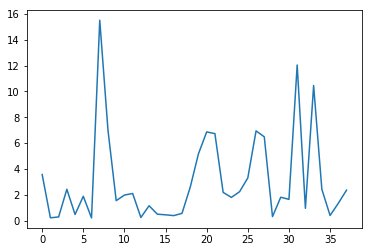

In [38]:
plt.plot(list(range(0,38)), df[6])
plt.show()